# Phase 1: The Detective Work (Setup & Inspection)

## Goal:
Understand the structure and content of the dataset before making any changes.

This dataset contains customer analytics information.  
Each row represents one customer record.

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("customer_analytics.csv")

df.head()


,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    str    
 3   City                  255 non-null    str    
 4   Education             243 non-null    str    
 5   MaritalStatus         255 non-null    str    
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    str    
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), str(5)
memory usage: 28.0 KB


In [4]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


In [5]:
df.shape

(255, 14)

# Phase 2: Data Cleaning

## Goal:
Clean the dataset by handling missing values and duplicates.

Cleaning Strategy:
- Drop columns with more than 50% missing values.
- Fill numerical missing values using mean.
- Fill categorical missing values using mode.
- Remove duplicate rows.

In [6]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [8]:
# Drop columns with too many missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns
cat_cols = df.select_dtypes(include=['object', 'string']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

# Phase 3: Deep Dive (Univariate & Bivariate Analysis)

## Goal:
Understand distributions and relationships between variables.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

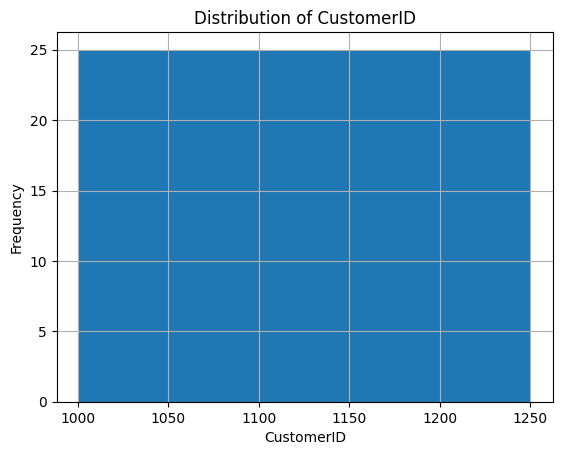

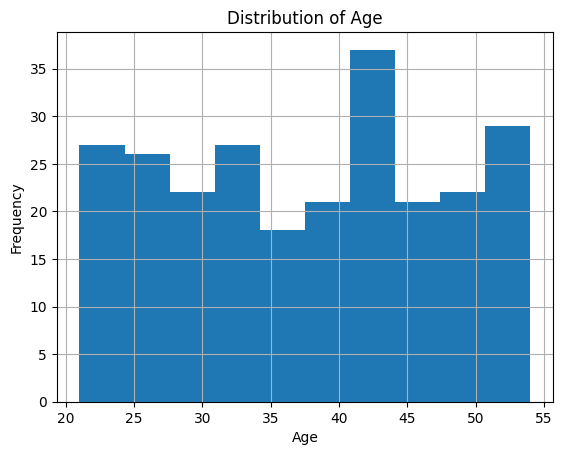

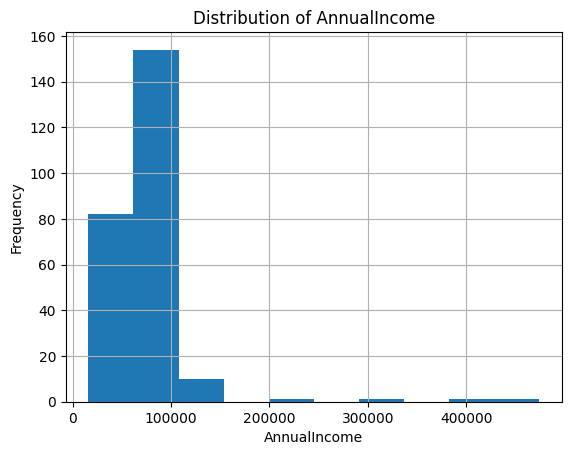

In [10]:
# Histogram for first 3 numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols[:3]:
    plt.figure()
    df[col].hist()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Observation:
The histogram shows how the data is distributed and whether it is skewed or normally distributed.

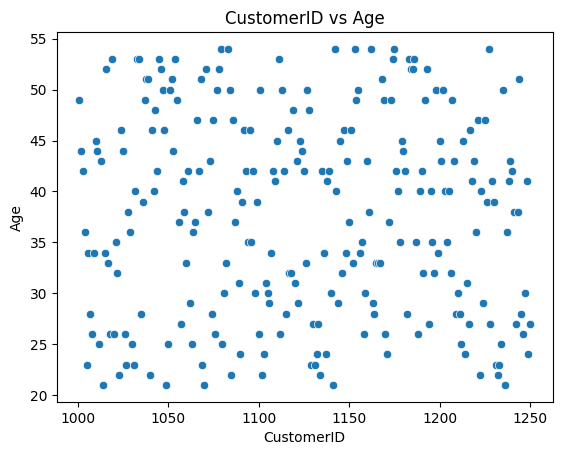

In [11]:
if len(num_cols) >= 2:
    plt.figure()
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.show()

Observation:
The scatter plot shows the relationship between the two numerical variables and whether they are positively or negatively correlated.

# Phase 4: The Big Picture (Multivariate & Storytelling)

## Goal:
Identify complex relationships and summarize key insights.

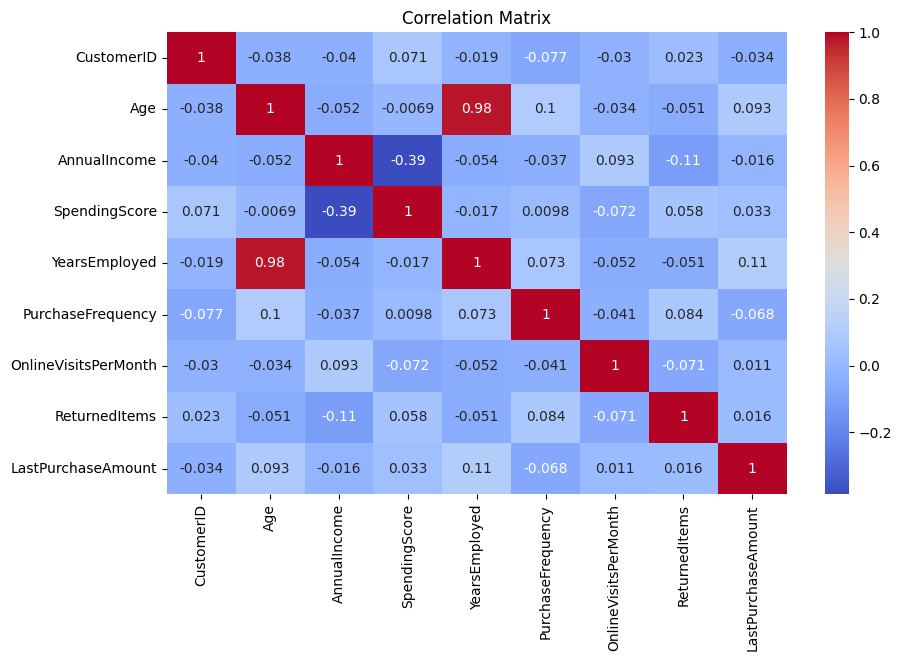

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Executive Summary

1. The dataset was cleaned by handling missing values and removing duplicates.
2. Numerical variables show different distribution patterns.
3. Some variables show positive correlation in the heatmap.
4. The dataset is now ready for further modeling or business decision making.